# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [56]:
#Your code here
clower = {}
for i in df.columns:
    clower[i] = i.lower()

df = df.rename(columns = clower)
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [57]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the index back

In [58]:
# Your code here
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [59]:
# Your code here
def train_lines(lines):
    return len(lines)

df['train_lines'] = df.linename.map(train_lines)
df = df.sort_values('train_lines', ascending=False)
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,train_lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name

In [60]:
def clean(col_name):
    cleaned = col_name.replace(' ','')
    return cleaned

In [61]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [62]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'train_lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

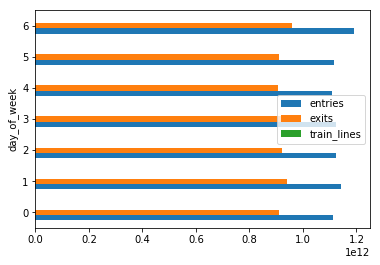

In [63]:
#Your code here
df.date = pd.to_datetime(df.date)
df['day_of_week'] = df.date.dt.dayofweek
df = df.sort_values('day_of_week')

x = df.groupby('day_of_week').sum()
x.plot(kind='barh')

## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

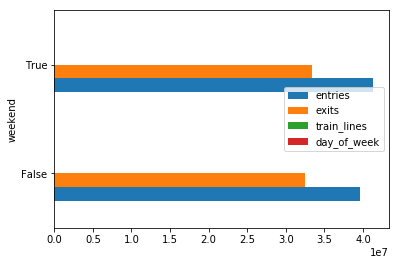

In [67]:
#Your code here
df['weekend'] = df.day_of_week.map({0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True})
weeknd = df.groupby('weekend').mean()
weeknd.plot(kind='barh')

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Drop a couple of columns

In [68]:
# Your code here
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,train_lines,day_of_week,weekend
1656,NQRW,A011,R080,01-00-05,57 ST-7 AV,BMT,2018-08-27,08:00:00,REGULAR,1952678,1800778,4,0,False
6551,NRW,A042,R086,01-00-03,PRINCE ST,BMT,2018-08-27,08:00:00,REGULAR,4692673,5906428,3,0,False
6549,NRW,A042,R086,01-00-03,PRINCE ST,BMT,2018-08-27,00:00:00,REGULAR,4692638,5906360,3,0,False
36094,E,JFK03,R536,00-03-03,JFK JAMAICA CT1,IND,2018-08-27,01:00:00,REGULAR,42200,11795,1,0,False
36069,E,JFK03,R536,00-03-02,JFK JAMAICA CT1,IND,2018-08-27,17:00:00,REGULAR,404837,231027,1,0,False


In [71]:
df = df.drop(['c/a', 'unit'], axis=1)
df.head(3)

,linename,scp,station,division,date,time,desc,entries,exits,train_lines,day_of_week,weekend
1656,NQRW,01-00-05,57 ST-7 AV,BMT,2018-08-27,08:00:00,REGULAR,1952678,1800778,4,0,False
6551,NRW,01-00-03,PRINCE ST,BMT,2018-08-27,08:00:00,REGULAR,4692673,5906428,3,0,False
6549,NRW,01-00-03,PRINCE ST,BMT,2018-08-27,00:00:00,REGULAR,4692638,5906360,3,0,False


## Summary

Great! You practiced your data cleanup-skills using Pandas.